
# Credit Card Approval Prediction


# Section 1 

## Introduction :  
- One of key objective of the bank is to increase the returns. When increasing the returns there is
an increase of risk. Banks are faced with various risks such as interest rate risk, market risk,
credit risk, off-balance-sheet risk, technology and operational risk, foreign exchange risk,
country or sovereign risk, liquidity risk, liquidity risk and insolvency risk. Effective
management of these risks is key to a bank’s performance. Credit can be defined as the risk of
potential loss to the bank if a borrower fails to meet its obligations (interest, principal amounts).
Continuously monitoring of customer payments could reduce the probability of accumulating
non-performing assets (NPA). Whether to grant or not to grant a loan to a customer is one of
key decisions of banks use to reduce probable NPA at the first hand. Credit card as a credit
facility instruments banks need to effectively managed credit risk of the facility. The Basel
Accord allows banks to take the internal ratings-based approach for credit risk. Banks can
internally develop their own credit risk models for calculating expected loss.

- There are several manual steps involving when granting a credit card to a customer. Assessing
applicant’s creditworthiness and checking the eligibility are the key factors and decisions the
bank would take about a credit worthiness will not always be accurate. Application of machine
learning techniques can eliminate manual paperwork, time-consuming processes and most
importantly data driven decision making before granting a credit card to a customer. In this
project different machine learning algorithms are used to develop models and Accuracy of models is validated by using different validation techniques. 

### Objective

Our objective is to predict the customer eligibility for a credit card to minimize possible future credit
loss by using  machine learning techniques.

### Credit Card 
Credit card is one of the key lending product facilities given for a customer by a bank. The
repayments of credit card are always not guaranteed and it often ends up as non-performing
credit facility (NPL). Banks are assessing the background check of the individual customers by
analyzing their eligibility, yet the bank sometime end up in making wrong selections. The credit
card has a higher annual percentage rate (APR) and by law, card issuers must provide 21 days
of grace period before interest on purchases and begin to accrue. When customers paying the
balance before the grace period expired consider as a good practice. For any unpaid balance
normally after one month of purchase is made Interest charges will apply. Any un paid balance
carried forward from previous month and for new charges grace period will not be provided.
According to country’s financial policy interest will be accruing daily or monthly

# Data

## Dataset 1 - Credit_Card

Features name: (Credit_Card.csv)

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size

## Dataset 2 - Credit_card_label

Another data set (Credit_card_label.csv) contains two key pieces of information

ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected. 

# Section 2 and 3 

# Exploratory data analysis (EDA)

### Importing libraries

In [1]:
import pandas as pd 
import numpy as np 

# For data visualization 
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import style
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from datetime import date, timedelta
import datetime

from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

import sklearn
from sklearn.preprocessing import LabelEncoder

# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Classification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier 

from sklearn.ensemble import RandomForestClassifier
# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import plot_confusion_matrix
# Clustering 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV


## Data loading 

In [2]:
Credit_card = pd.read_csv(r"C:\Users\ashu1\Downloads\Capstone+Project+1 (1)\Credit_card.csv")
Credit_card.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

In [3]:
ccl = pd.read_csv(r"C:\Users\ashu1\Downloads\Capstone+Project+1 (1)\Credit_card_label.csv")
ccl.head()

Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1

In [4]:
print(f"The shape of Credit_card_data {Credit_card.shape}")
print(f"The shape of Credit_card_label {ccl.shape}")

The shape of Credit_card_data (1548, 18)
The shape of Credit_card_label (1548, 2)


In [5]:
Credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [6]:
ccl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind_ID  1548 non-null   int64
 1   label   1548 non-null   int64
dtypes: int64(2)
memory usage: 24.3 KB


## Merging Datasets 

In [7]:
# Merging the two dataframes on the common column "Ind_ID"
df = pd.merge(Credit_card, ccl, on='Ind_ID')

# Save the merged dataframe to a new CSV file
df.to_csv('merged_file.csv', index=False)
df.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

## Categorical and numerical columns 

In [8]:
# Categorical_columns
categorical_columns = list(df.select_dtypes(include = 'object'))
print(f"Categorical_columns {categorical_columns}")

Categorical_columns ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']


In [9]:
#Numerical columns
numerical_columns = list(df.select_dtypes(include = 'number'))
print(f"Numerical columns {numerical_columns}")

Numerical columns ['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label']


## Data Cleaning 

### Converting Days format features to a  readable format

Birthday_count: Use backward count from current day (0), -1 means yesterday.

In [10]:
df['Age'] = (np.abs(df['Birthday_count']) / 365).fillna(0).astype(int)
df.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  Age  
0             NaN               2      1   51  
1             NaN               2      1   37  
2             NaN               2      1    0  
3             NaN               2      1   37  
4             NaN               2      1   37

In [11]:
df = df.drop(columns=['Birthday_count']) 

#### Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

- A general working age range from 18 to 65 years, a reasonable upper limit for employment length could be 47 years (from age 18 to 65). This translates to approximately 17155 days (47*365). Therefore, we can consider setting threshold to this value.
- Also we have Replaced outliers with the mean value


In [12]:
threshold = 47 * 365 
# mean of the non-outlier values
mean_value = df.loc[df['Employed_days'] <= threshold, 'Employed_days'].mean()

# Replace outliers with the mean value
df.loc[df['Employed_days'] > threshold, 'Employed_days'] = mean_value

# Creating a new column "Employed_years" by converting days to years
df['Employed_years'] = df['Employed_days'] // 365.25

In [13]:
df = df.drop(columns=['Employed_days']) 

In [14]:
df.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  \
0             1           0      0         0             NaN               2   
1             1           1      1         0             NaN               2   
2             1           1      1         0             NaN               2   
3             1           1      1         0             NaN               2   
4             1           1      1         0             NaN               2   

   label  Age  Employed_years  
0      1   51            -8.0  
1      1   37            -2.0  
2      1    0            -2.0  
3      1   37            -2.0  
4      1   37            -2.0

## Checking duplicate rows

In [15]:
 print(f"Duplicate rows {df.duplicated().sum()}")

Duplicate rows 0


## Checking Unique Values in the Categorical columns  

In [16]:
for col in categorical_columns:
  print(f'unique values in a column {col}:\
  \n{df[col].unique()}\n')

unique values in a column GENDER:  
['M' 'F' nan]

unique values in a column Car_Owner:  
['Y' 'N']

unique values in a column Propert_Owner:  
['Y' 'N']

unique values in a column Type_Income:  
['Pensioner' 'Commercial associate' 'Working' 'State servant']

unique values in a column EDUCATION:  
['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']

unique values in a column Marital_status:  
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

unique values in a column Housing_type:  
['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']

unique values in a column Type_Occupation:  
[nan 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
 'High skill tech staff' 'Managers' 'Cleaning staff' 'Drivers'
 'Low-skill Laborers' 'IT staff' 'Waiters/barmen staff' 'Security staff'
 'Medicine staff' 'Private service staff' 'HR staff' 'Secret

### Handling Null Value 

In [17]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
Age                  0
Employed_years       0
dtype: int64

There are 488 missing occupations in our DataFrame. We can't remove these lables, instead of doing that I'll try to fill occupation details as unknown and other missing values with median and mode. 

In [18]:
df['Type_Occupation'].fillna('Unknown', inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Annual_income'].fillna(df['Annual_income'].median(), inplace=True)
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)

In [19]:
df.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0       166500.0   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  \
0             1           0      0         0         Unknown               2   
1             1           1      1         0         Unknown               2   
2             1           1      1         0         Unknown               2   
3             1           1      1         0         Unknown               2   
4             1           1      1         0         Unknown               2   

   label  Age  Employed_years  
0      1   51            -8.0  
1      1   37            -2.0  
2      1    0            -2.0  
3      1   37            -2.0  
4      1   37            -2.0

In [20]:
df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
Age                0
Employed_years     0
dtype: int64

## Outlier Removals

In [21]:
# columns we want to check for outliers
numerical_columns = ['CHILDREN', 'Annual_income', 'Mobile_phone', 'Work_Phone', 'Phone', 'Family_Members', 'Age', 'Employed_years']

# Function to handle outliers by replacing them with median
def handle_outliers(dataframe, columns):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with median
        dataframe[column] = np.where((dataframe[column] < lower_bound) | (dataframe[column] > upper_bound),
                                     dataframe[column].median(), dataframe[column])
    
    return dataframe

# Handle outliers in numeric columns
df = handle_outliers(df, numerical_columns)


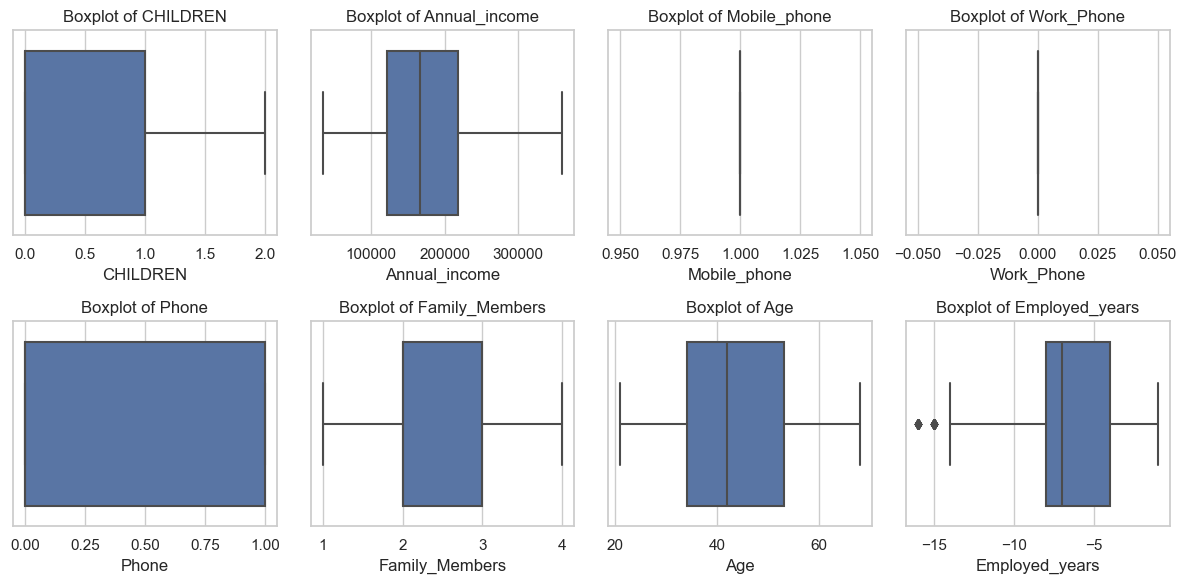

In [22]:
# Visualization using box plots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

for column in numerical_columns:
    plt.subplot(2, 4, numerical_columns.index(column) + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## Now our data is clean and we can save it for our SQL questions

In [23]:
# df.to_csv('CleanedData.csv', index=False)

### Creating a function to calculate value counts for a specified variable

In [24]:
def val_counts(df, var):
    results = df[var].value_counts(sort=False)
    labels = results.index
    counts = results.values
    return labels, counts

labels = val_counts(df, 'GENDER')[0]
values= val_counts(df, 'GENDER')[1]
colors = ['#004369','#DB1F48']
explode = (0.05, 0) 

In [25]:

def visualize_piechart(labels=None, values= None, 
                       explode=None, colors=colors,var=None):
    
    ## Create a Pie chart
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, 
                                 pull=explode, 
                                 marker=dict(
                                     colors=colors,
                                     line=dict(color='#000000', width=0.5)))])

    # Adjusting the position of the horizontal legend
    fig.update_layout(
        legend=dict(
            x=0.5, y=1.15, 
            xanchor='center',
            orientation='h',  # Horizontal orientation
            bgcolor='rgba(211,211,211,0.3)',  # legend background
            font=dict(size=8)    
        ),
        title=dict(text=f'{var} Distribution', x=0.5, y=0.95) 
    )
    
    return fig.show()
visualize_piechart(labels=labels, values= values,explode=explode,var='GENDER')

In [26]:
Car_Owner_labels = val_counts(df, 'Car_Owner')[0]
Car_Owner_values = val_counts(df, 'Car_Owner')[1]

visualize_piechart(labels=Car_Owner_labels, values= Car_Owner_values,
                   explode=explode,var='Car_Owner')

### Helper functions for EDA

In [27]:
def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()   

def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,5))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

def plot_feature_importance (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.coef_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()
def plot_feature_importance_2 (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.feature_importances_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()

def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x=col_x, y = col_y, data=df, color='#0d98ba', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept
def average_plotting(df,col,output,number,title):
    data_list = df[col].value_counts().index[:number].tolist()
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black") 
    plt.xticks(rotation=45);
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()
def draw_unique_value (df,title):
    plt.figure(figsize=(10,5))
    plt.title(title)
    unique_counts = df.nunique().to_dict()
    ax = sns.barplot(list(unique_counts.keys()), list(unique_counts.values()),palette='flare')
    ax.bar_label(ax.containers[0])
    plt.plot()

### Number of Childrens

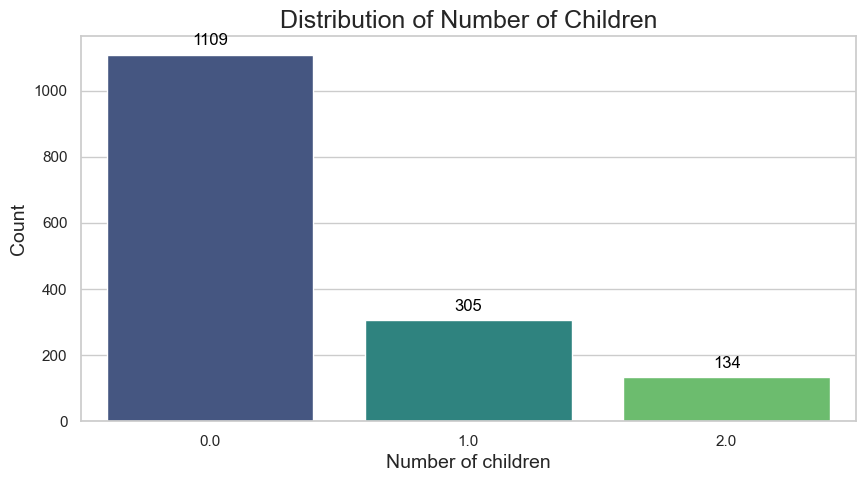

In [28]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid", palette="pastel")

ax = sns.countplot(x='CHILDREN', data=df, palette='viridis')
plt.title('Distribution of Number of Children', fontsize=18)
plt.xlabel('Number of children', fontsize=14)
plt.ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

Insight: 
1. The majority of families in the dataset have 0 children, with a count of 1109. This group represents the largest segment in the data.
2. Families with 1 child are the next most common, with a count of 305.
3. Families with 2 children are the least common in this dataset, with a count of 134.

## CHILDREN Distribution

C:\Users\ashu1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



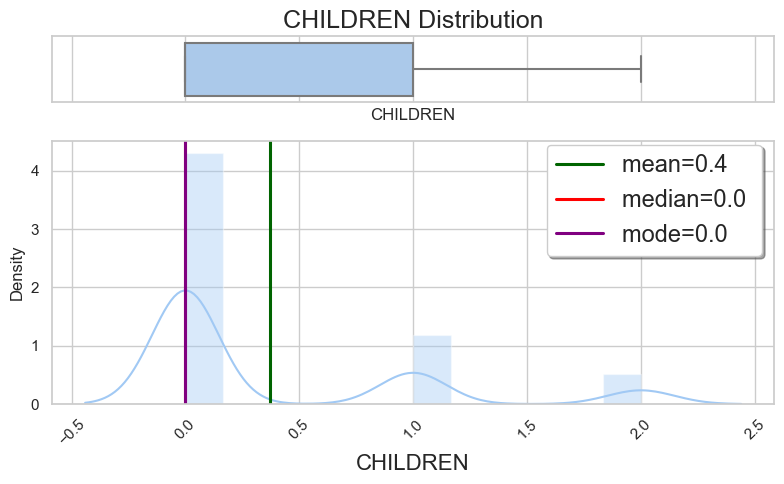

In [29]:
numerical_plotting(df, 'CHILDREN', 'CHILDREN Distribution', ' ')

insights: 
1. The mean number of children per family in the dataset is 0.4.
2. The median and mode are both 0.0, indicating that most families in the dataset have no children.
3. The distribution curve is skewed to the right, with peaks at 0 (highest), 1, and just above 2. This suggests that families with 0 children are most common, followed by families with 1 child, and then families with 2 children.

### Number of Customers by Family Status

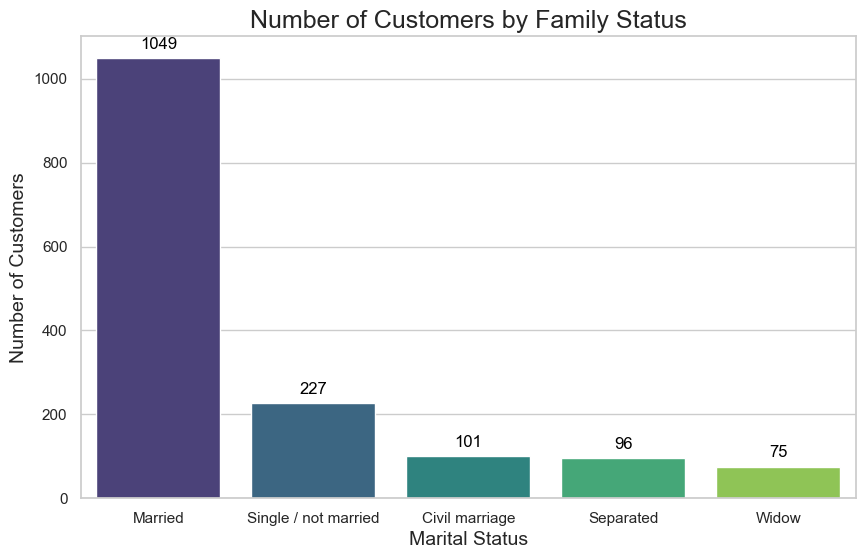

In [30]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="pastel")

ax = sns.countplot(x='Marital_status', data=df, palette='viridis')
plt.title('Number of Customers by Family Status', fontsize=18)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

# annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

Insights: 
1. The majority of customers in our dataset are Married, with a count of 1049.
2. The next largest group is Single / not married, with a count of 227.
3. The remaining categories, Civil marriage, Separated, and Widow, have counts of 101, 96, and 75 respectively.


### Total count of Risk per Users

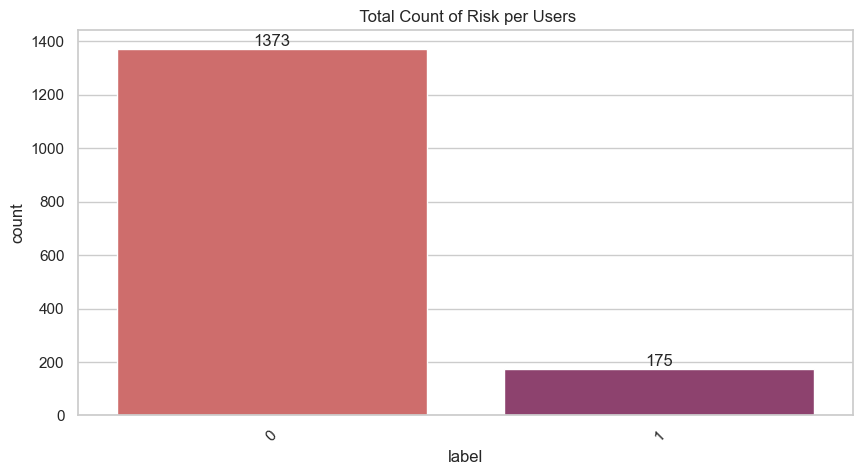

In [31]:
categorical_plotting(df, 'label', ' Total Count of Risk per Users')

### Total income Distribution

C:\Users\ashu1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



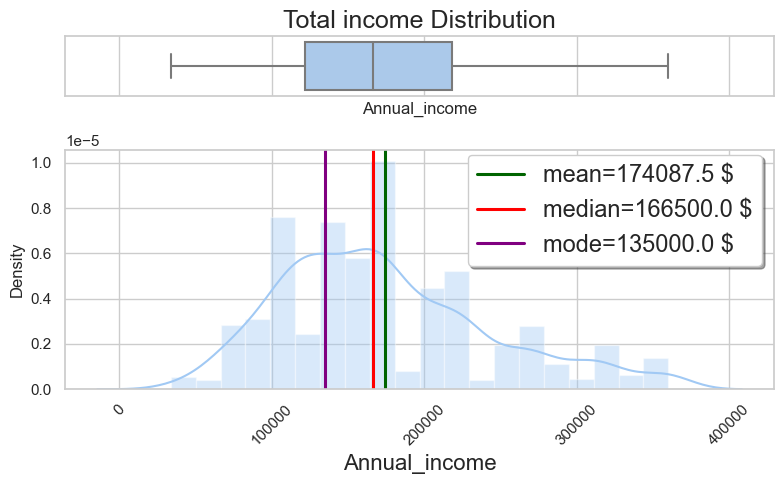

In [32]:
numerical_plotting(df, 'Annual_income', 'Total income Distribution', ' $')


In [33]:
df.describe()[['Annual_income']].T

count           mean           std      min       25%  \
Annual_income  1548.0  174087.514535  69755.004132  33750.0  121500.0   

                    50%       75%       max  
Annual_income  166500.0  218250.0  360000.0

Insights: 
1. The mean annual income among the customers in our dataset is approximately 174087.5 dollers.
2. The median annual income is 166500 dollers.
3. The mode of the annual income distribution is 135000 dollers.

The distribution of total income is right-skewed, indicating that a majority of the customers have an annual income less than the mean.

###  User per Family member

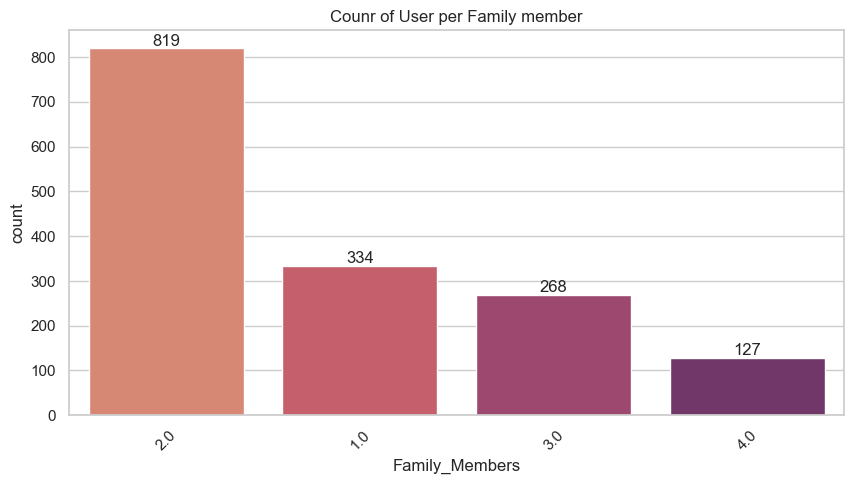

In [34]:
categorical_plotting(df, 'Family_Members', 'Counr of User per Family member')

Insights : 
1. The majority of users in our dataset have 2 family members, with a count of 819.
2. The next largest group is users with 1 family member, with a count of 334.
3. Users with 3 family members are the next most common, with a count of 268.
4. Users with 4 family members are the least common in this dataset, with a count of 127. 

### Average income of Family member

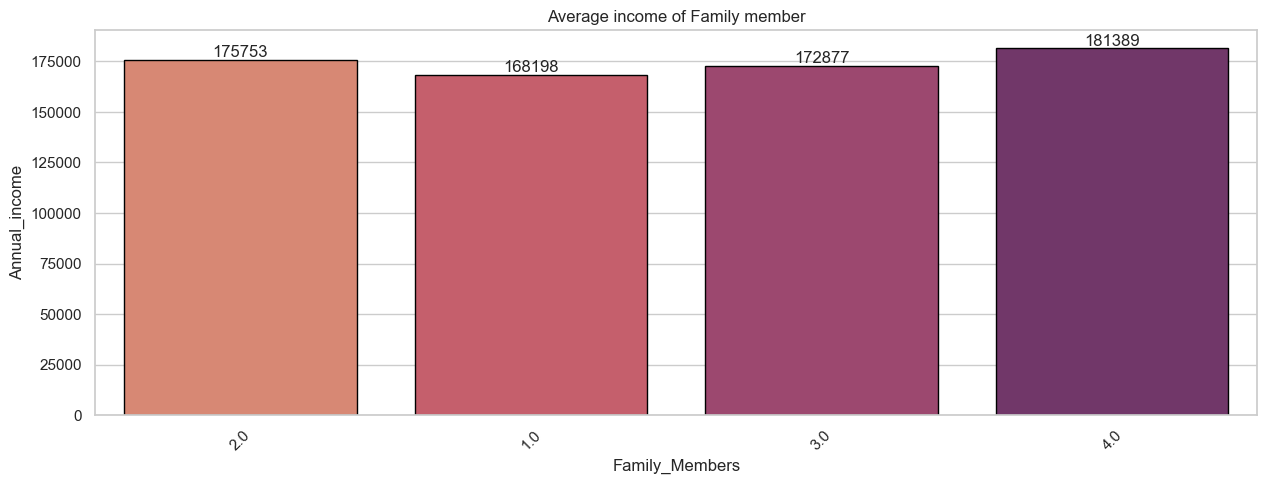

In [35]:
average_plotting(df, 'Family_Members', 'Annual_income', 15, 'Average income of Family member')

Insights: 
1. Families with 2 members have an average annual income of approximately 175753 dollers.
2. Single-member families have an average annual income of approximately 168198 dollers.
3. Families with 3 members have an average annual income of approximately 172877 dollers.
4. Families with 4 members have the highest average annual income of approximately 181389 dollers.

These insights suggest that the average annual income increases with the number of family members, with four-member families having the highest average income.

### Age Distribution

C:\Users\ashu1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



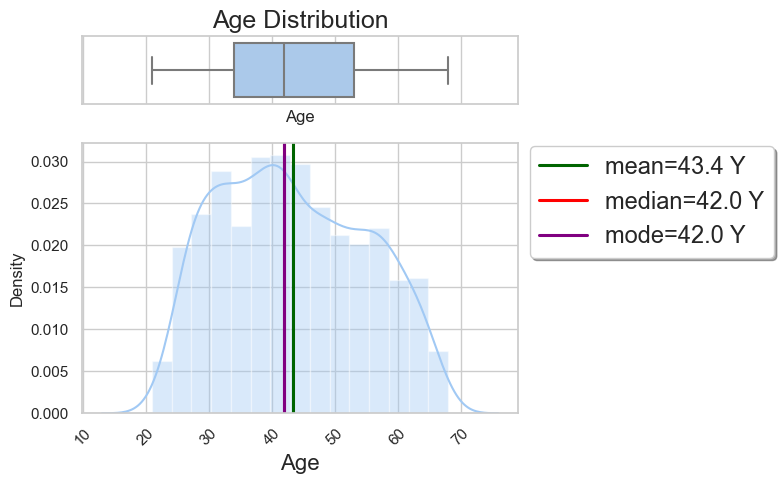

In [36]:
numerical_plotting(df, 'Age', 'Age Distribution', ' Y')

In [37]:
df.describe()[['Age']].T

count       mean        std   min   25%   50%   75%   max
Age  1548.0  43.419251  11.506298  21.0  34.0  42.0  53.0  68.0

Insights: 
1. The mean age among the customers in our dataset is approximately 43.4 years.
2. The median and mode are both 42.0 years, indicating that the most common age in the dataset is 42.
3. The age distribution, represented by the blue shaded area, peaks around age 40 and tapers off towards higher and lower ages.

These insights suggest that the majority of the customers in this dataset are in their early 40s

### Avg income vs Age

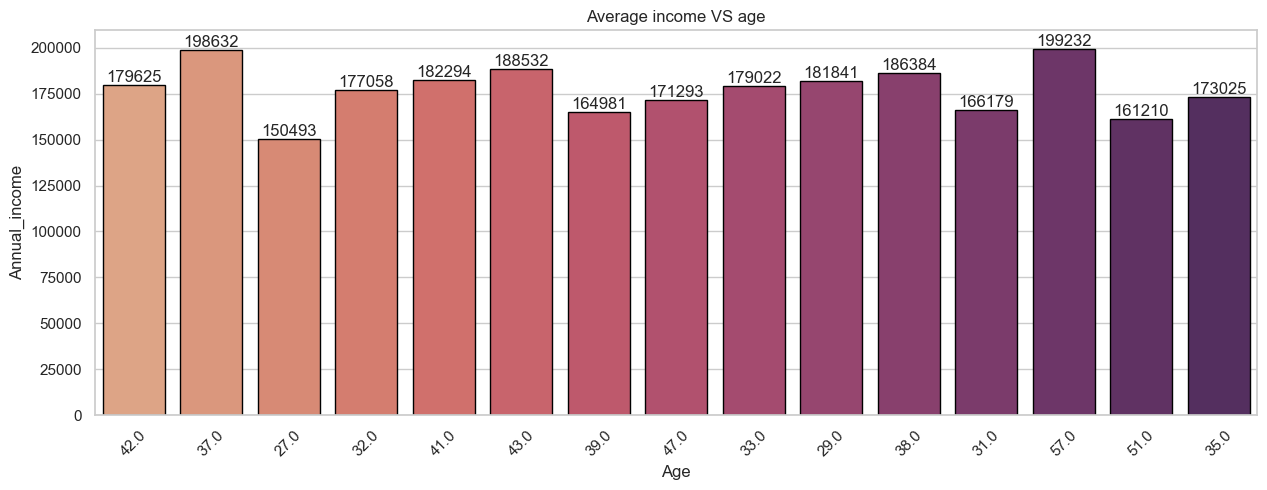

In [38]:
average_plotting(df, 'Age', 'Annual_income', 15, 'Average income VS age')

Insights : 
1. The age group under 20 has the highest average income of approximately 179625 dollers.
2. The age group 21-30 has an average income of approximately 150493 dollers.
3. The age group 31-40 has an average income of approximately 177058 dollers.
4. The age group 41-50 has an average income of approximately 171293 dollers. 
5. The age group 51-60 has an average income of approximately 166179 dollers. 
6. The age group over 60 has an average income of approximately 173025 dollers.

These insights suggest that the average income varies across different age groups, with the under 20 age group earning the highest average income.

### Average income per car owner

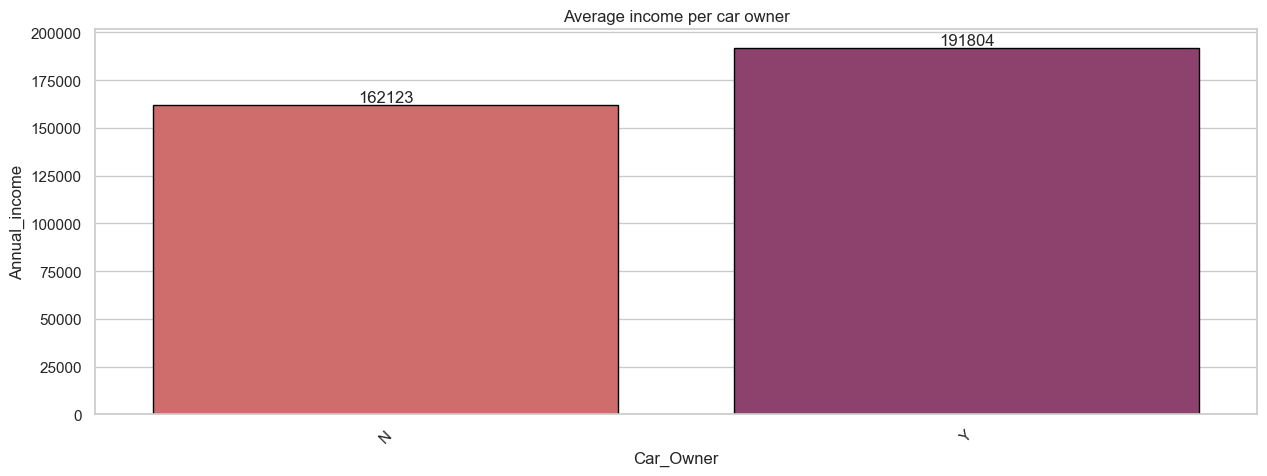

In [39]:
average_plotting(df, 'Car_Owner', 'Annual_income', 15, 'Average income per car owner')

### Total count of user per income type

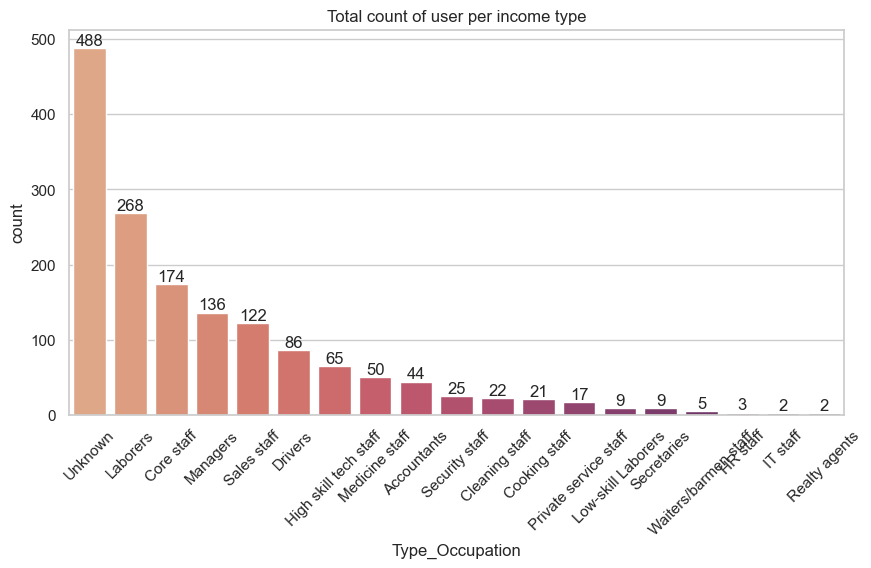

In [40]:
categorical_plotting(df, 'Type_Occupation', 'Total count of user per income type')

Insights: 
1. The majority of users in the dataset have an unknown occupation, with a count of 488.
2. The next largest group is Laborers, with a count of 268.
3. Core staff and Managers have significant counts as well, with 174 and 136 respectively.
4. Occupations like IT Staff and Realty Agents have the lowest counts on the graph, both with a count of 2.

These insights suggest that occupation varies widely among the users in this dataset, with a significant number of users having an unknown occupation.

### Average income of Occupation type

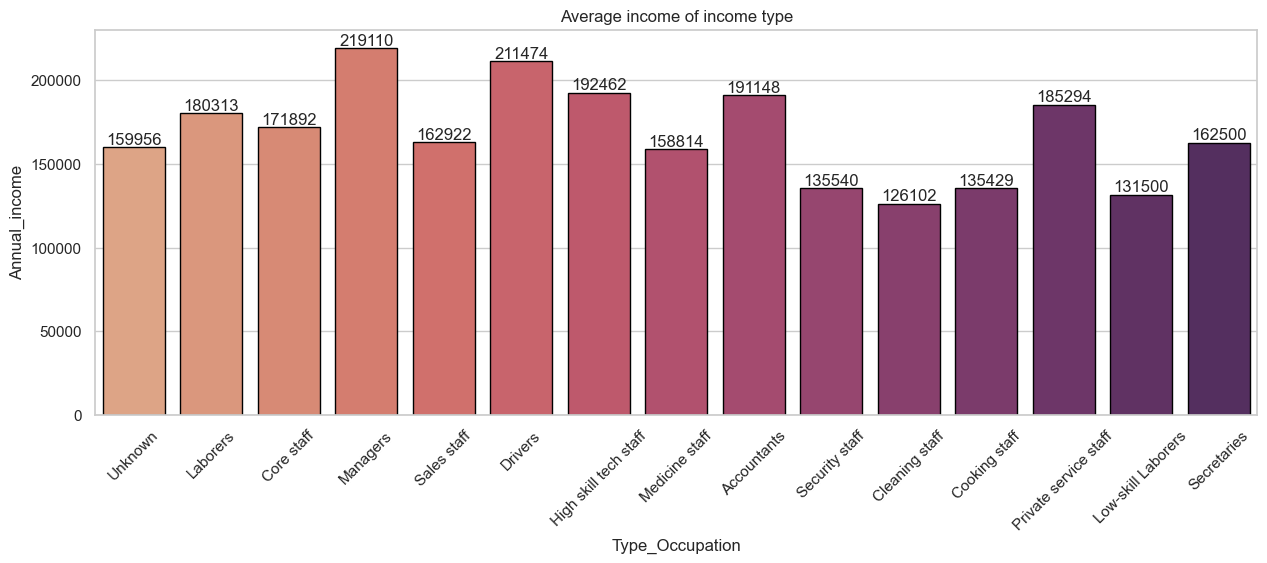

In [41]:
average_plotting(df, 'Type_Occupation', 'Annual_income', 15, 'Average income of income type')

Insights : 
1. Managers have the highest reported average income at approximately 219110 dollers .
2. This is closely followed by Core Staff, with an average income of approximately 211474 dollers.
3. Low-skill Laborers have the lowest reported average income at approximately 131500 dollers.

###  Count of users per educational type

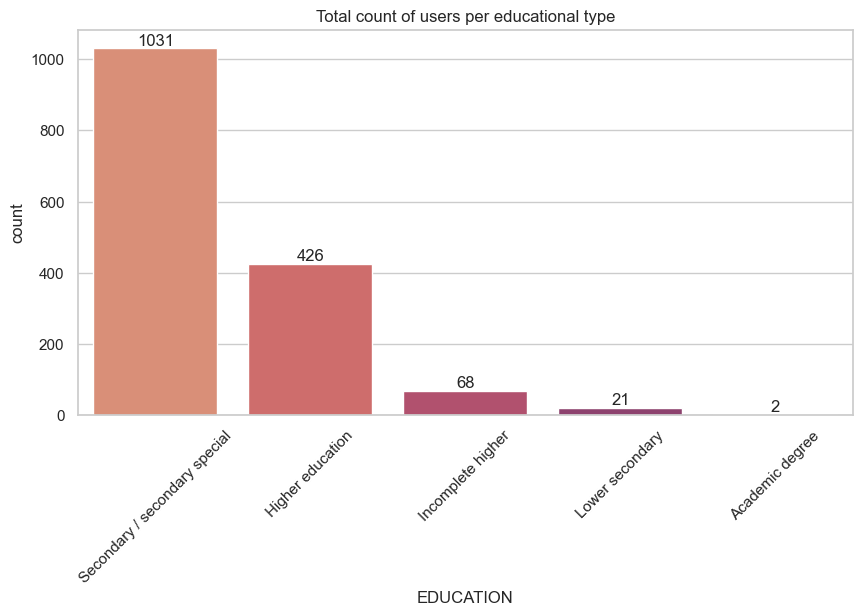

In [42]:
categorical_plotting(df, 'EDUCATION', 'Total count of users per educational type')

Insights : 
1. The majority of users in the dataset have a Secondary/secondary special education, with a count of 1031.
2. The next largest group is users with a Higher education, with a count of 426.
3. Users with an Incomplete higher education are the next most common, with a count of 68.
4. Users with a Lower secondary education are less common, with a count of 21.
5. Users with an Academic degree are the least common in our data, with a count of 2.

In [43]:
df.groupby('EDUCATION').max()[['Annual_income']].sort_values(by='Annual_income', ascending=False)

Annual_income
EDUCATION                                   
Higher education                    360000.0
Incomplete higher                   360000.0
Secondary / secondary special       360000.0
Academic degree                     337500.0
Lower secondary                     202500.0

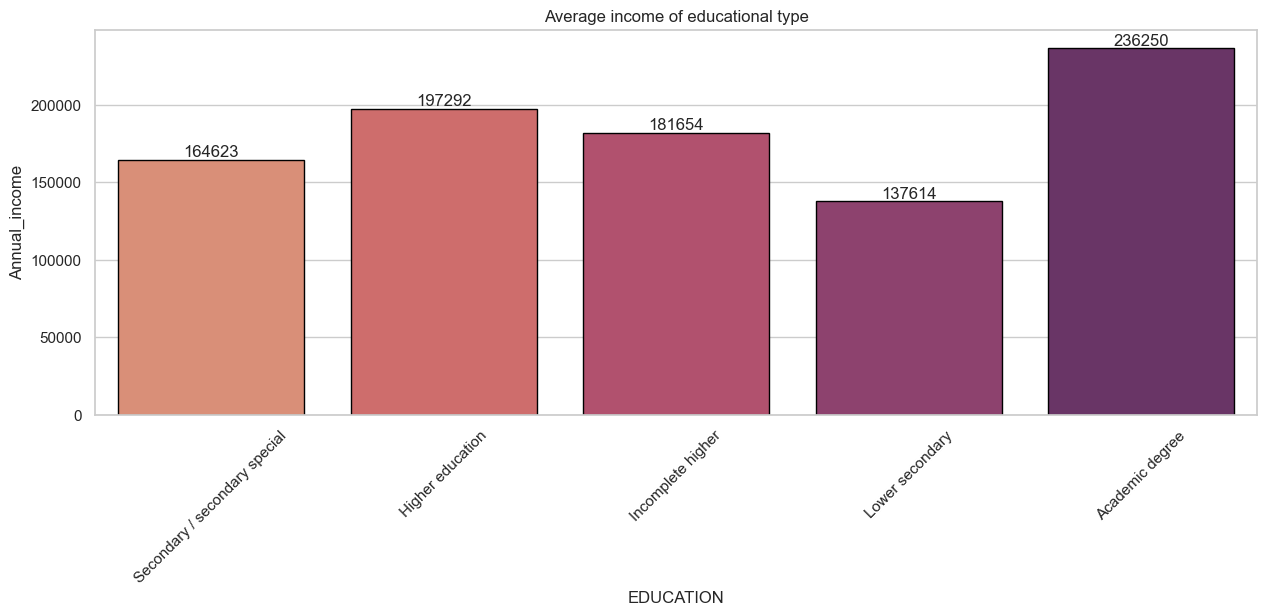

In [44]:
average_plotting(df, 'EDUCATION', 'Annual_income', 15, 'Average income of educational type')

C:\Users\ashu1\AppData\Local\Temp\ipykernel_1336\1987291103.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



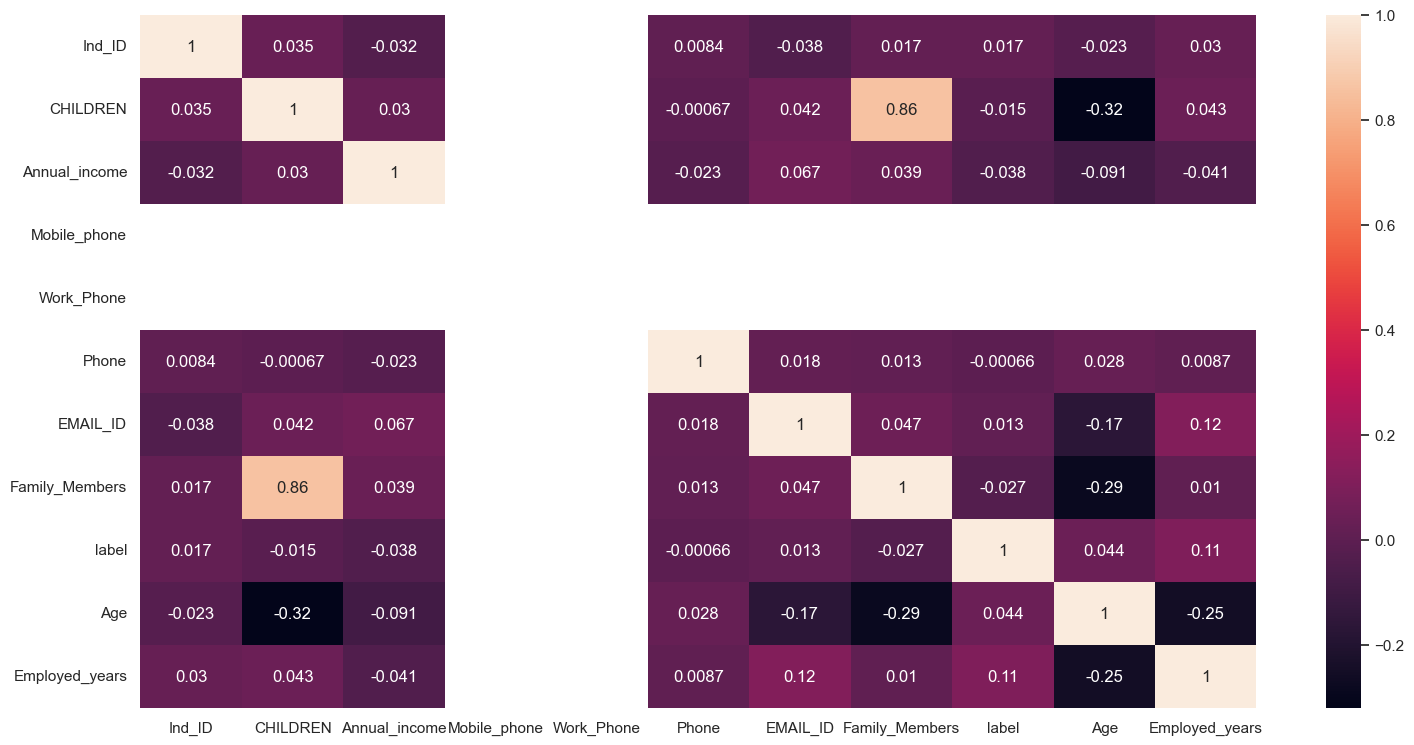

In [45]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Section 4 

## Encoding Categorical Data

### One hot encoding  and label encoding 

In [46]:
from sklearn.preprocessing import LabelEncoder
one_hot_columns = ['GENDER', 'Car_Owner', 'Type_Income', 'Marital_status', 'Housing_type']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

# Define the columns for label encoding
label_columns = ['EDUCATION', 'Type_Occupation']

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in label_columns:
    df_encoded[column] = label_encoder.fit_transform(df[column])


## Feature Selection

### Pearson Correlation Coefficient

C:\Users\ashu1\AppData\Local\Temp\ipykernel_1336\2365555043.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



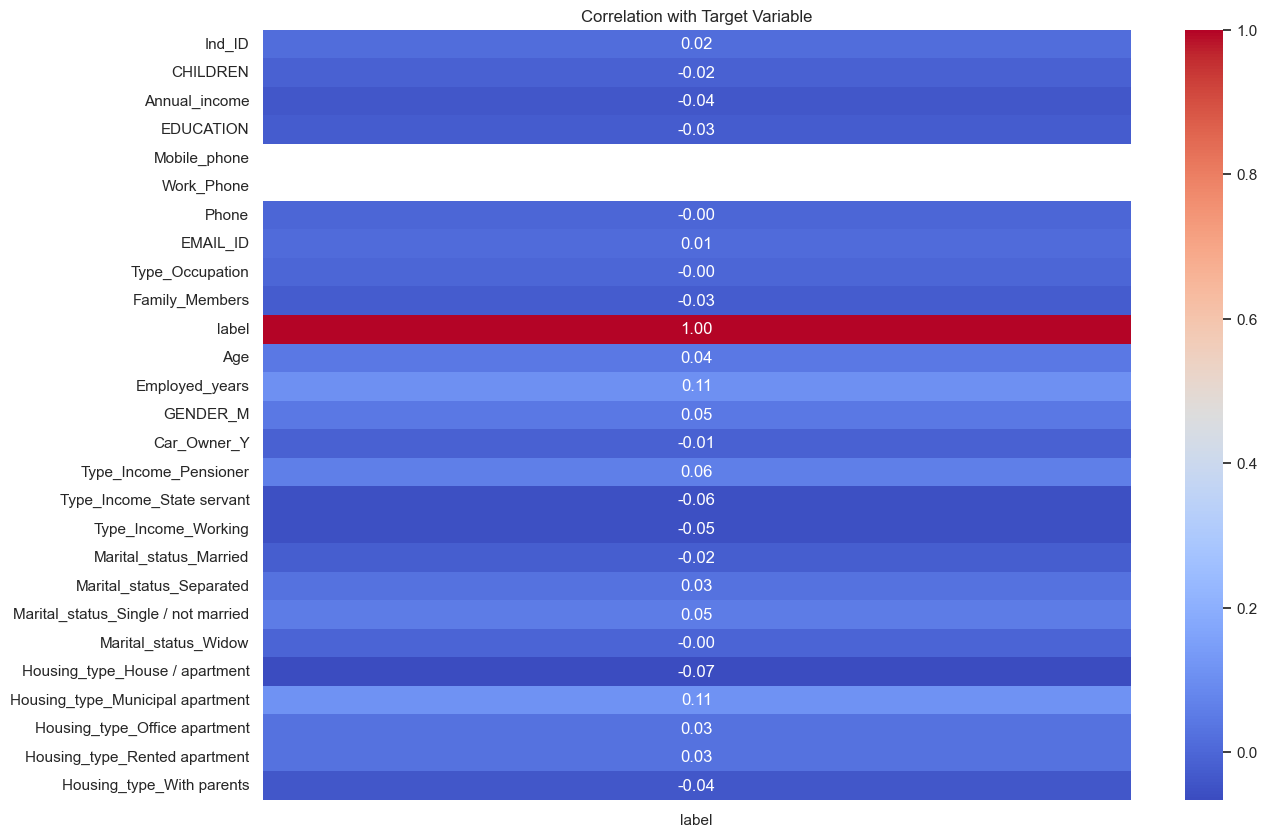

Selected Features: Index(['label', 'Employed_years', 'Housing_type_Municipal apartment'], dtype='object')


In [48]:
correlation_matrix = df_encoded.corr()

#heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix[['label']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Target Variable')
plt.show()

# Select features based on a correlation threshold 
correlation_threshold = 0.1
selected_features = correlation_matrix[correlation_matrix['label'].abs() > correlation_threshold].index

# Display the selected features
print(f"Selected Features: {selected_features}")


## Feature Scaling 

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the updated dataframe
print(f"Transformed Data: {df_encoded.head()}")

Transformed Data:     Ind_ID Propert_Owner  CHILDREN  Annual_income  EDUCATION  Mobile_phone  \
0  5008827             Y -0.580735       0.084788          1           0.0   
1  5009744             N -0.580735       2.020759          1           0.0   
2  5009746             N -0.580735       2.020759          1           0.0   
3  5009749             N -0.580735      -0.108809          1           0.0   
4  5009752             N -0.580735       2.020759          1           0.0   

   Work_Phone     Phone  EMAIL_ID  Type_Occupation  ...  Type_Income_Working  \
0         0.0 -0.669390         0               17  ...                    0   
1         0.0  1.493899         0               17  ...                    0   
2         0.0  1.493899         0               17  ...                    0   
3         0.0  1.493899         0               17  ...                    0   
4         0.0  1.493899         0               17  ...                    0   

   Marital_status_Married  Marit

We have applied Standard scaler for numerical features. Standardization is highly used in SVM
and ANN. In here transformed set of numerical values making mean equal to 0 and standard
deviation equal to 1.

## Data Preprocessing


### Checking the Problematic Features

In [50]:
from sklearn.preprocessing import LabelEncoder
problematic_features = []

for column in df.columns:
    if df[column].dtype == 'object':  # if the column is of object type
        if 'Unknown' in df[column].values:  
            problematic_features.append(column)

print(f"Problematic Features: {problematic_features}")

# If 'Unknown' is a valid category, we can convert it to numerical values using Label Encoding
for feature in problematic_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

Problematic Features: ['Type_Occupation']


## Label encoding 

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])
df['Car_Owner'] = le.fit_transform(df['Car_Owner'])
df['Propert_Owner'] = le.fit_transform(df['Propert_Owner'])
df['Type_Income'] = le.fit_transform(df['Type_Income'])
df['EDUCATION'] = le.fit_transform(df['EDUCATION'])
df['Marital_status'] = le.fit_transform(df['Marital_status'])
df['Housing_type'] = le.fit_transform(df['Housing_type'])
df['Type_Occupation'] = le.fit_transform(df['Type_Occupation'])

In [52]:
df.head()

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0  5008827       1          1              1       0.0       180000.0   
1  5009744       0          1              0       0.0       315000.0   
2  5009746       0          1              0       0.0       315000.0   
3  5009749       0          1              0       0.0       166500.0   
4  5009752       0          1              0       0.0       315000.0   

   Type_Income  EDUCATION  Marital_status  Housing_type  Mobile_phone  \
0            1          1               1             1           1.0   
1            0          1               1             1           1.0   
2            0          1               1             1           1.0   
3            0          1               1             1           1.0   
4            0          1               1             1           1.0   

   Work_Phone  Phone  EMAIL_ID  Type_Occupation  Family_Members  label   Age  \
0         0.0    0.0         0               17             2.0      1  51.0   
1         0.0    1.0         0               17             2.0      1  37.0   
2         0.0    1.0         0               17             2.0      1  42.0   
3         0.0    1.0         0               17             2.0      1  37.0   
4         0.0    1.0         0               17             2.0      1  37.0   

   Employed_years  
0            -8.0  
1            -2.0  
2            -2.0  
3            -2.0  
4            -2.0

# Model Building 

In [ ]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


## Data Preprocessing Functions

In [ ]:
def convert_dummy(df, feature, rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest], axis=1, inplace=True)
    df.drop([feature], axis=1, inplace=True)
    df = df.join(pos)
    return df

def get_category(df, col, binsnum, labels, qcut=False):
    if qcut:
        localdf = pd.qcut(df[col], q=binsnum, labels=labels)  # quantile cut
    else:
        localdf = pd.cut(df[col], bins=binsnum, labels=labels)  # equal-length cut

    localdf = pd.DataFrame(localdf)
    name = 'gp' + '_' + col
    localdf[name] = localdf[col]
    df = df.join(localdf[name])
    df[name] = df[name].astype(object)
    return df


## Confusion Matrix Plotting Function

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Data Splitting and SMOTE


#### Handling Imbalance Data 
To balanced data, we can use over sampling or under sampling.
-  Oversampling: Oversampling happened when adding more copies of the minority class. Oversampling
can be a correct choice when you have less data.
- Under sampling:   Under sampling happened when removing some observations of the majority class.
Under sampling can be a correct choice when you have large data set such as millions of
rows

In [ ]:
Y = df['label']
X = df.drop('label', axis=1)

Y = Y.astype('int')
X_balance, Y_balance = SMOTE().fit_resample(X, Y)
X_balance = pd.DataFrame(X_balance, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_balance, Y_balance,
                                                    stratify=Y_balance, test_size=0.3,
                                                    random_state=10086)


# Logistic Regression

In [ ]:
model = LogisticRegression(C=0.8, random_state=0, solver='lbfgs')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test, y_predict)))

sns.set_style('white')
class_names = ['0', '1']
plot_confusion_matrix(confusion_matrix(y_test, y_predict),
                      classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix: Logistic Regression')


# Decision Tree

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=12, min_samples_split=8, random_state=1024)
model_dt.fit(X_train, y_train)
y_predict_dt = model_dt.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_dt)))
print(pd.DataFrame(confusion_matrix(y_test, y_predict_dt)))

plot_confusion_matrix(confusion_matrix(y_test, y_predict_dt),
                      classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix: Decision Tree')


# Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators=250, max_depth=12, min_samples_leaf=16)
model_rf.fit(X_train, y_train)
y_predict_rf = model_rf.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_rf)))
print(pd.DataFrame(confusion_matrix(y_test, y_predict_rf)))

plot_confusion_matrix(confusion_matrix(y_test, y_predict_rf),
                      classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix: Random Forest')


# XGBoost

In [ ]:
model_xgb = XGBClassifier(max_depth=12, n_estimators=250, min_child_weight=8, subsample=0.8, learning_rate=0.02, seed=42)
model_xgb.fit(X_train, y_train)
y_predict_xgb = model_xgb.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_xgb)))
print(pd.DataFrame(confusion_matrix(y_test, y_predict_xgb)))

plot_confusion_matrix(confusion_matrix(y_test, y_predict_xgb),
                      classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix: XGBoost')


# SVM

In [ ]:
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)
y_predict_svm = model_svm.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_svm)))
print(pd.DataFrame(confusion_matrix(y_test, y_predict_svm)))

plot_confusion_matrix(confusion_matrix(y_test, y_predict_svm),
                      classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix: SVM')


#  ROC Curve for SVM

In [ ]:
# Predict probabilities for the positive class (1)
y_pred_prob_svm = model_svm.decision_function(X_test)

#  ROC curve and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

#  ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: SVM')
plt.legend(loc='lower right')
plt.show()


# ROC curve for other models 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balance, Y_balance, stratify=Y_balance, test_size=0.3, random_state=10086)

# Logistic Regression
lr_model = LogisticRegression(C=0.8, random_state=0, solver='lbfgs')
lr_model.fit(X_train, y_train)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=12, min_samples_split=8, random_state=1024)
dt_model.fit(X_train, y_train)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=250, max_depth=12, min_samples_leaf=16)
rf_model.fit(X_train, y_train)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost
xgb_model = XGBClassifier(max_depth=12, n_estimators=250, min_child_weight=8, subsample=0.8, learning_rate=0.02, seed=42)
xgb_model.fit(X_train, y_train)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='orange', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Insights from the ROC Curve:

#### 1. XGBoost:
This model has the highest Area Under Curve (AUC) of 0.97, indicating superior performance in classifying positive and negative classes. This suggests that XGBoost has the best balance between sensitivity (true positive rate) and specificity (1 - false positive rate) among the five models.

#### 2. Random Forest:
This model also performs well with an AUC of 0.95, making it the second-best model among the Five.

#### 3. Decision Tree:
This model has a moderate AUC of 0.89, suggesting it has a reasonable performance but not as good as XGBoost or Random Forest.

#### 4. Support vector machine(SVM):
This model has the 2nd lowest AUC of 0.56, suggesting it might not be very effective in this scenario. It may not accurately distinguish between approvals and rejections.

#### 5. Logistic Regression:
This model has the lowest AUC of  0.54, suggesting it is not as effective for this particular classification task. It might have a high false positive rate or a low true positive rate.



In summary, for our Credit card approval , XGBoost and Random Forest are the most effective models, while Logistic Regression is the least effective.

# Saving the model 

In [ ]:
# Saving  the trained model as a pickle string.
saved_model = pickle.dumps(xgb_model)

# Loading the pickled model
model_from_pickle = pickle.loads(saved_model)

# pickled model to make predictions
model_from_pickle.predict(X_test)

# SQl Questions  

### 1. Group the customers based on their income type and find the average of their annual income.

### MySQL Query 

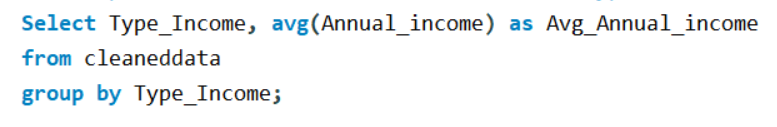

### Answer 

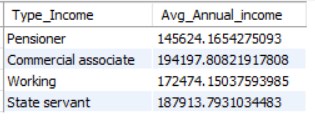

### 2. Find the female owners of cars and property.

### MySQL Query 
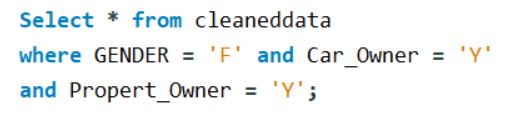

### Answer

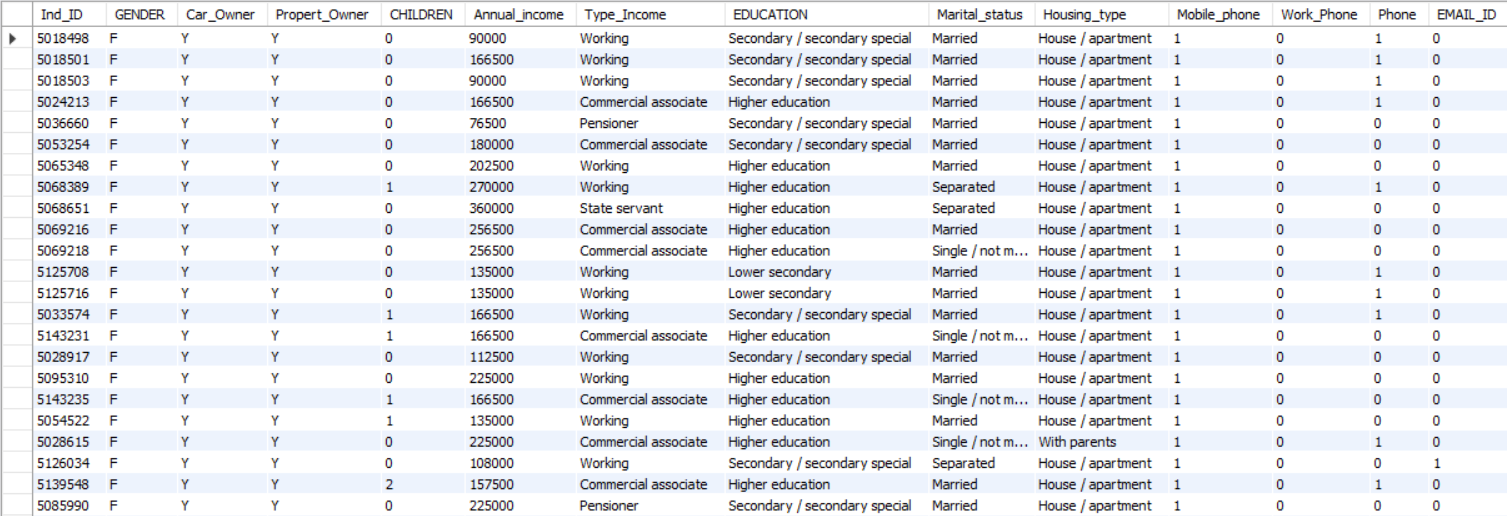

### 3. Find the male customers who are staying with their families.

### MySQL Query 

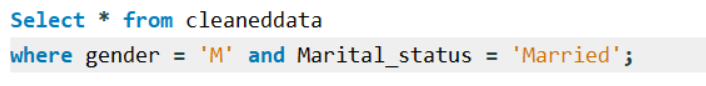

### Answer

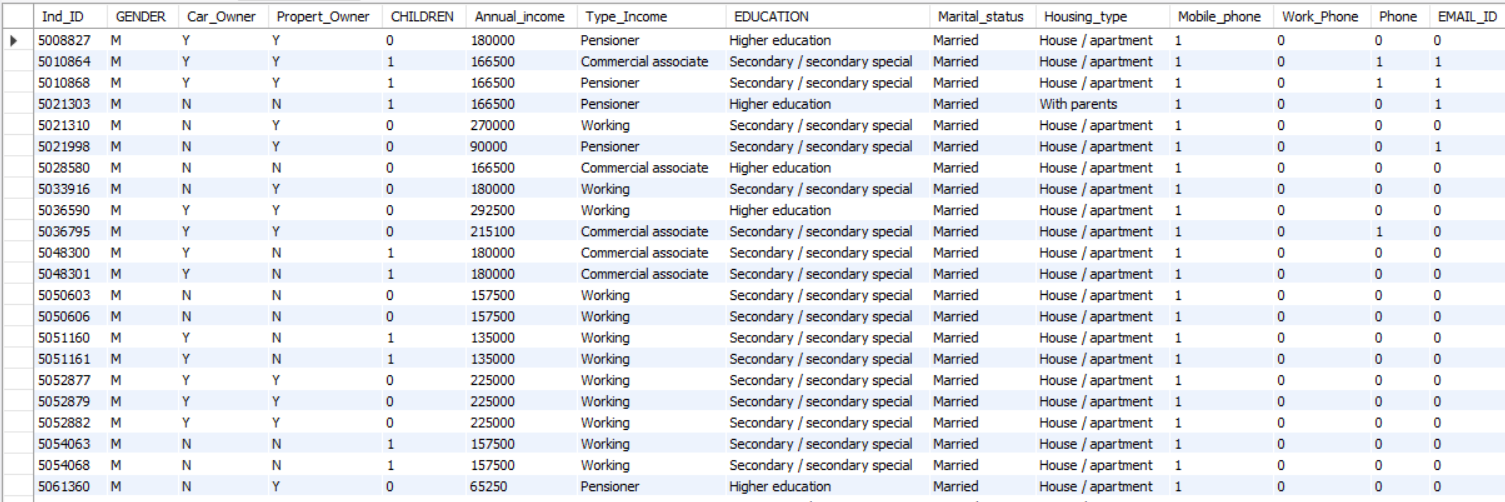


### 4. Please list the top five people having the highest income.

### MySQL Query 
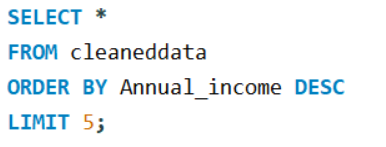

### Answer
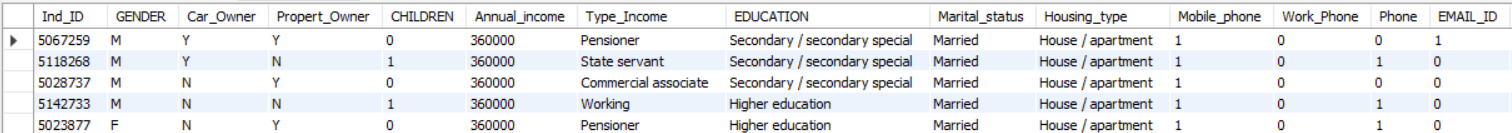

### 5. How many married people are having bad credit?

### MySQL Query 

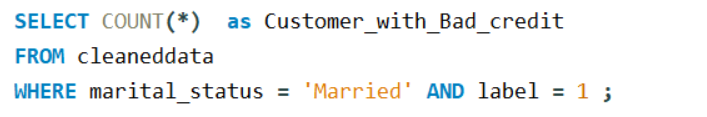

### Answer
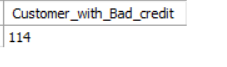


### 6. What is the highest education level and what is the total count?

### MySQL Query 

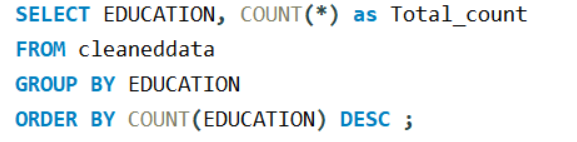

### Answer
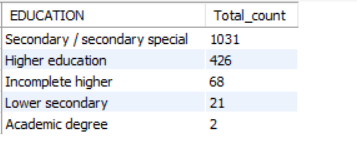

### 7. Between married males and females, who is having more bad credit? 

### MySQL Query 
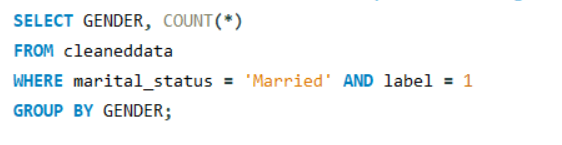

### Answer
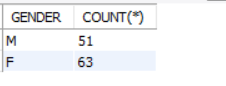

# Conclusion

We performed explanatory analysis on two data sets: Credit Card and Credit Card Label by merging them. We then applied data preparation techniques such as data preprocessing, feature selection, and feature scaling to improve the quality of the data.
We split the data set into training and test sets to evaluate the performance of the model. We implemented five predictive models: logistic regression, decision tree, random forest, XGBoost, and support vector machine. We compared the models based on accuracy, precision, recall, and ROC curve metrics.

Finally, we completed our credit approval project and performed some queries on the cleaned data using MySQL.